# Evaluated Libraries

In this section we briefly show you how to load and plot evaluated data. Let us start by importing some visualizing packages and `nucml.datasets` and setting up a directory where some of the generated figures can be saved.

In [1]:
# # PROTOTYPE
# import sys
# sys.path.append("../../")

In [2]:
import seaborn as sns
import nucml.datasets as nuc_data
import logging

logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [3]:
figure_dir = "Figures/" # saving directory

## Loading Evaluated Data

We can simply load ENDF data using the `load_evaluation()` method for any given isotope and reaction channel (`MT`).

In [4]:
chlorine_np = nuc_data.load_evaluation("cl35", 103)

Notice the path where the data is being loaded from. There will be cases where the requested data will not be avaliable. If missing, please submit an issue in the GitHub repo or if possible submit a PR with the needed data for the community to use.

In [9]:
uranium_nf = nuc_data.load_evaluation("u235", 18)

In [10]:
uranium_nf.head()

,Energy,Data
0,-5.000000,4.490276
1,-4.986224,4.483386
2,-4.972451,4.476500
3,-4.958670,4.469610
4,-4.944901,4.462724


In [12]:
uranium_nf.shape

(46678, 2)

## Plotting Evaluated Data
Next, `NucML` offers a variety of plotting utilities that will be explored later. In this case let us import the evaluation plotting utilities and use them to create visualizations of our cross sections.

In [5]:
import nucml.evaluation.plot as eval_plot

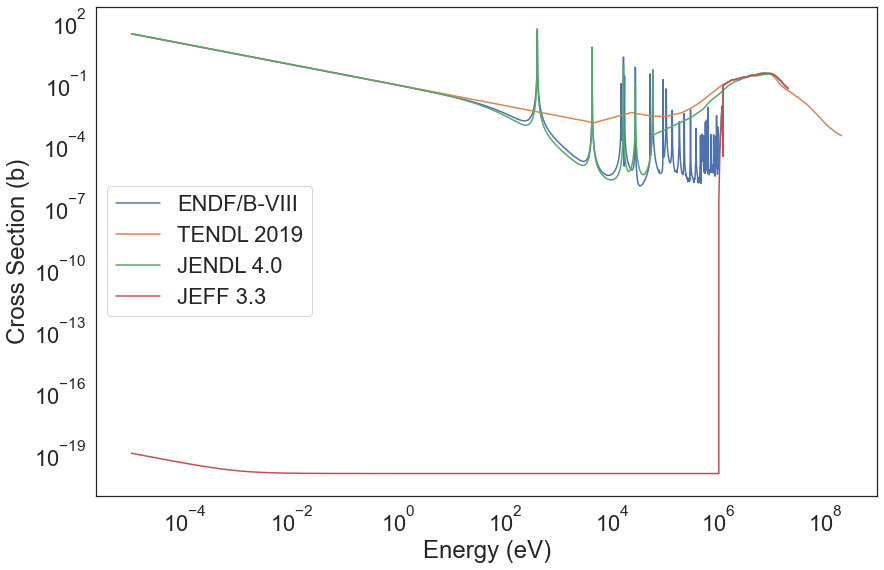

In [6]:
eval_plot.plot("Cl35", 103, save=True, save_dir=figure_dir)

Notice that all data will be queried from all avaliable evaluated libraries. The rendered figure will be saved in the previously specified saving directory. 

In this case the `JEFF` evaluation does not seem to be appropiate for the `Chlorine` reaction. We can easily exclude a library from this plot using the `exclude` argument.

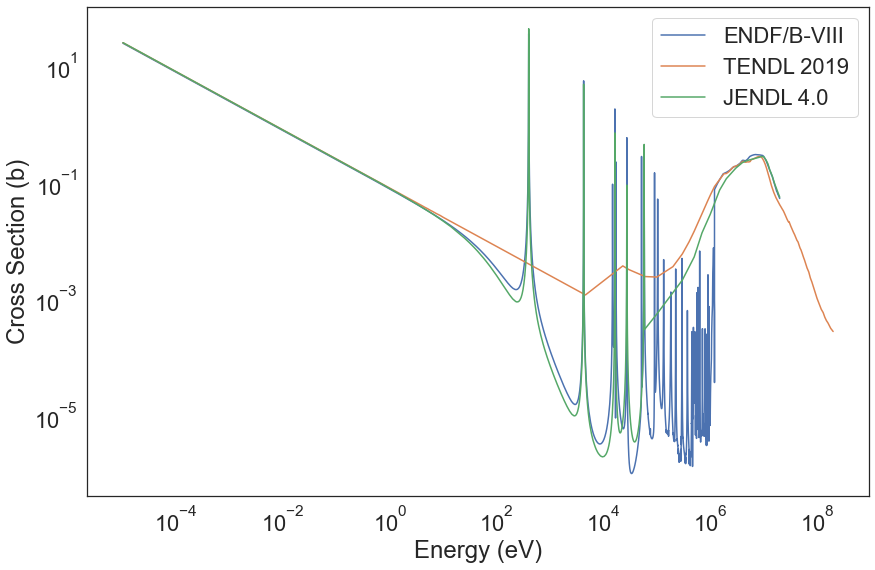

In [7]:
eval_plot.plot("Cl35", 103, exclude=["jeff"], save=True, save_dir=figure_dir)

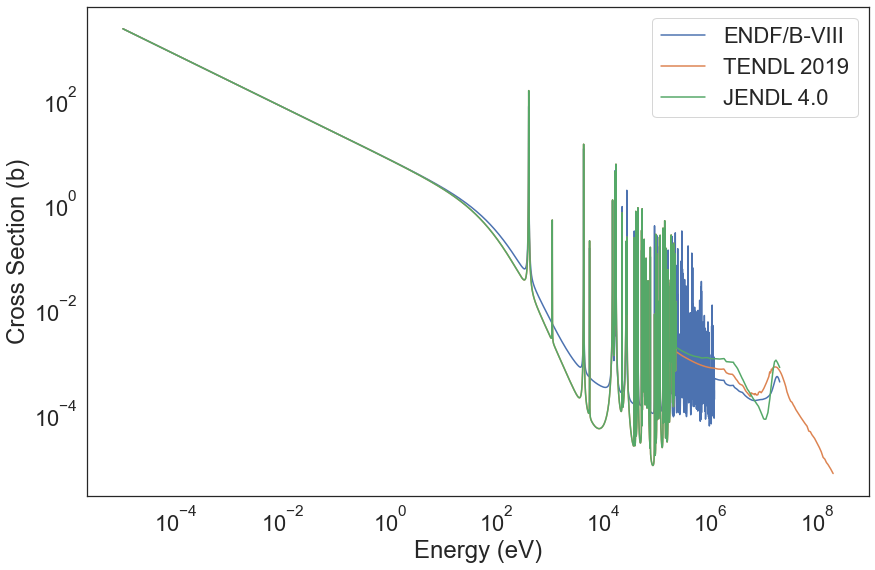

In [8]:
eval_plot.plot("Cl035", "102", exclude=["jeff"], save=True, save_dir=figure_dir)

The ENDF evaluation is the main database behind the evaluation functionalities. We can plot only ENDF data by excluding everything else. Let us try this for the total cross section for `Chlorine-35`:

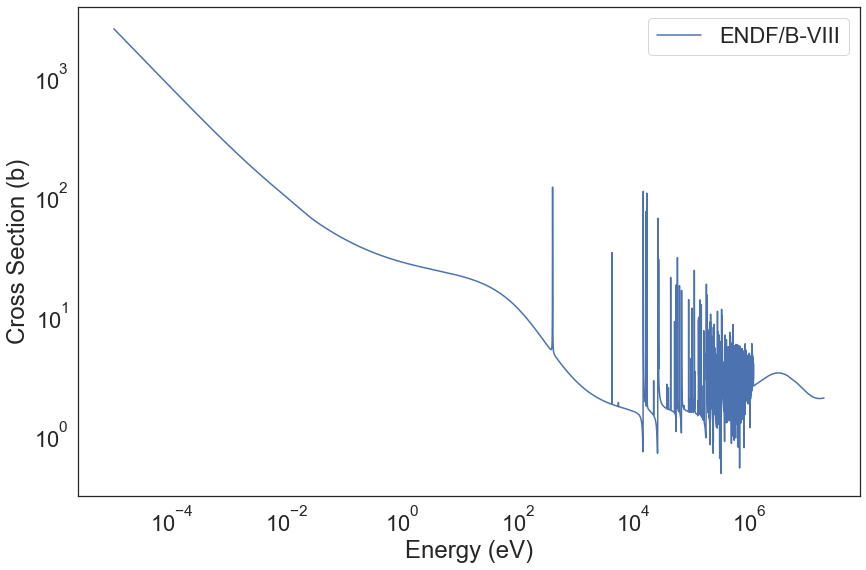

In [24]:
eval_plot.plot("Cl035", "1", save=True, save_dir=figure_dir, exclude=["all"])

You can even customize the order in which evaluations are plotted by passing in a dictionary that contains all needed keys. For example, to plot the `JENDL` evaluation first and the `ENDF` library last:

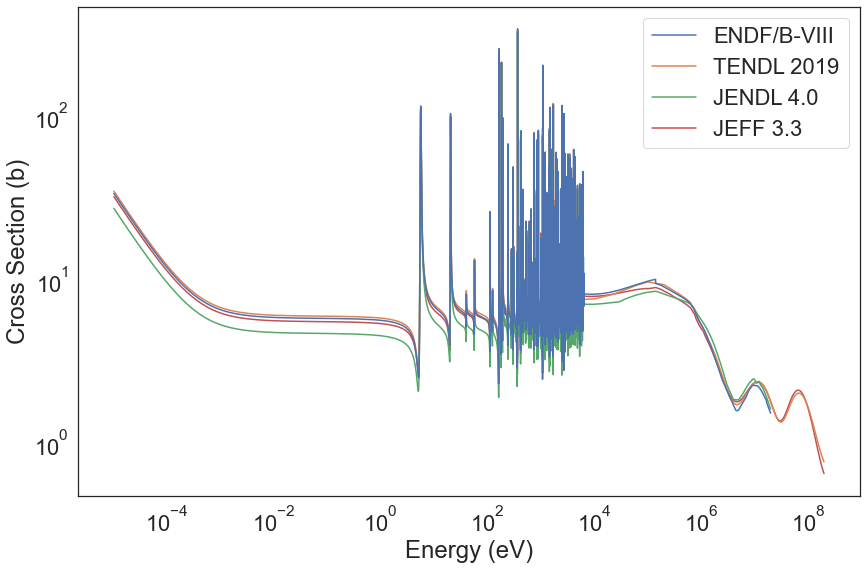

In [28]:
z_order_dict = {"endf":6, "new_data":2, "exfor":3, "tendl":4, "jendl":5, "jeff":1}
eval_plot.plot("Tc099", "2", save=True, save_dir=figure_dir, z_order_dict=z_order_dict)

## More Examples

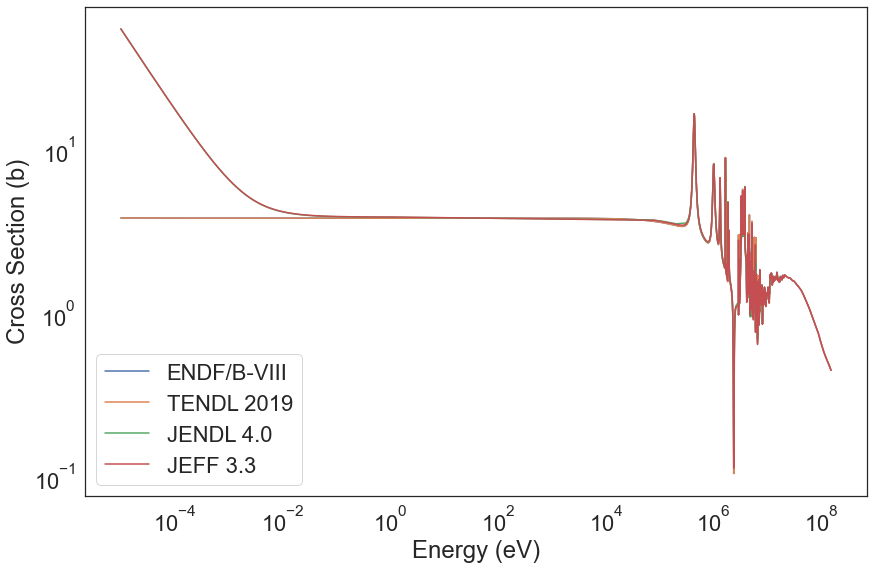

In [26]:
eval_plot.plot("O016", "1", save=True, save_dir=figure_dir)

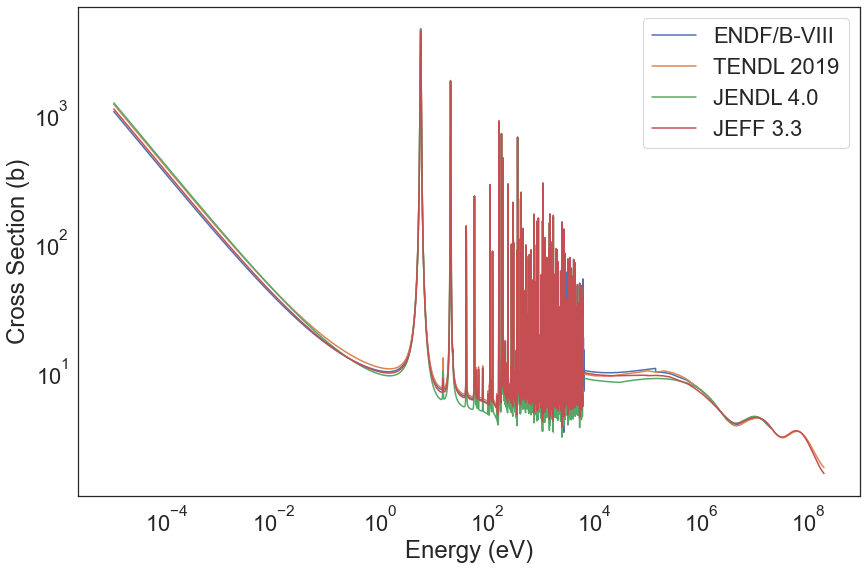

In [27]:
eval_plot.plot("Tc099", "1", save=True, save_dir=figure_dir)

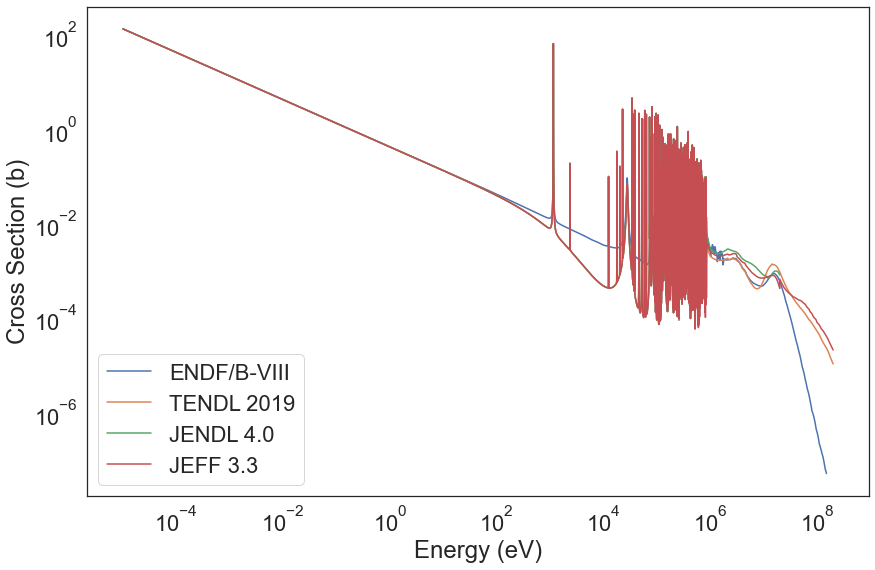

In [29]:
eval_plot.plot("Fe056", "102", save=True, save_dir=figure_dir)

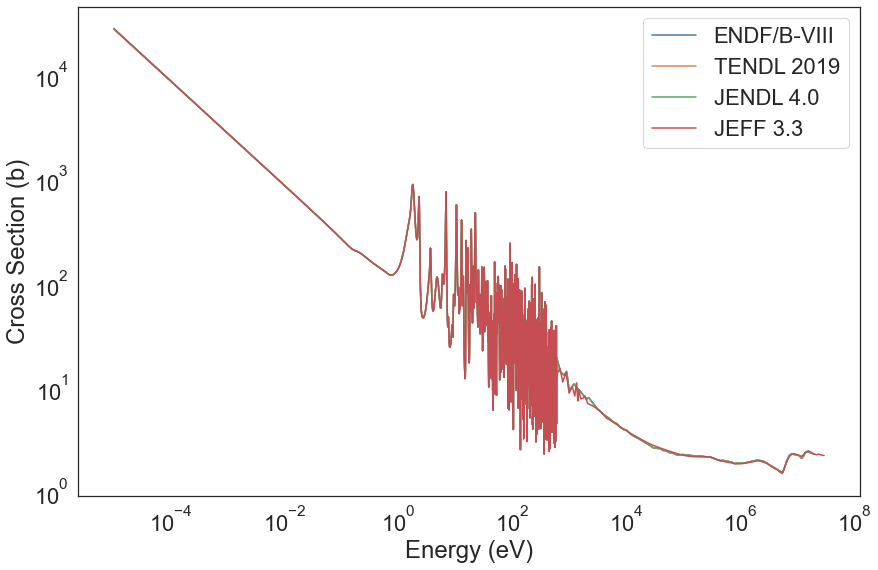

In [30]:
eval_plot.plot("U233", "018", save=True, save_dir=figure_dir)

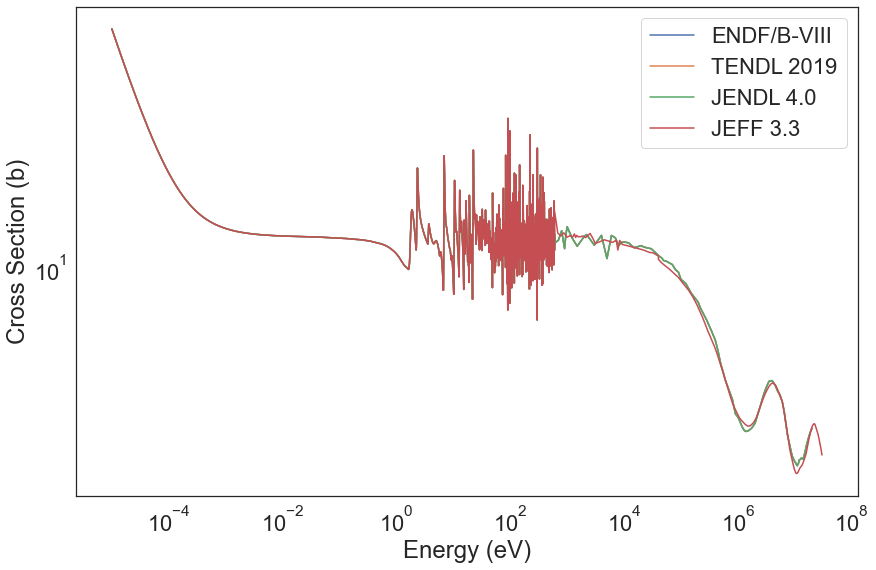

In [31]:
eval_plot.plot("U233", "002", save=True, save_dir=figure_dir)

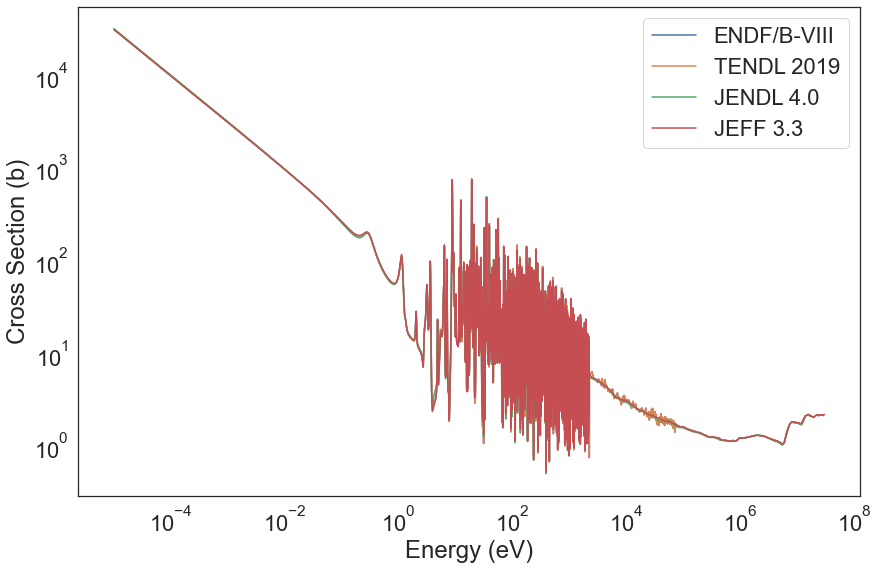

In [32]:
eval_plot.plot("U235", "018", save=True, save_dir=figure_dir)